<a href="https://colab.research.google.com/github/Shubham0Rajput/Edge-Detection-OpenCV/blob/master/edge-detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Custom convolution filtering
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 # 
image = cv2.imread('/content/drive/My Drive/image.jpg',0)
image = cv2.resize(image,(800,800))
 #Custom convolution kernel
 # Robertsedge operator
kernel_Roberts_x = np.array([
    [1, 0],
    [0, -1]
    ])
kernel_Roberts_y = np.array([
    [0, -1],
    [1, 0]
    ])
 # Sobel edge operator
kernel_Sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
kernel_Sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])
 # Prewitt edge operator
kernel_Prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])
kernel_Prewitt_y = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]])

In [ ]:
 # Kirsch edge detection operator
def kirsch(image):
    m,n = image.shape
    list=[]
    kirsch = np.zeros((m,n))
    for i in range(2,m-1):
        for j in range(2,n-1):
            d1 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d3 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d4 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d5 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] - 3
                  * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d7 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d8 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])

                         # : Take the maximum value in each direction, the effect is not good, use another method
            list=[d1, d2, d3, d4, d5, d6, d7, d8]
            kirsch[i,j]= int(np.sqrt(max(list)))
                         # : Rounding the die length in all directions
            #kirsch[i, j] =int(np.sqrt(d1+d2+d3+d4+d5+d6+d7+d8))
    for i in range(m):
        for j in range(n):
            if kirsch[i,j]>127:
                kirsch[i,j]=255
            else:
                kirsch[i,j]=0
    return kirsch

In [ ]:
# CannyEdge Detection k is the Gaussian kernel size, t1, t2 is the threshold size
def Canny(image,k,t1,t2):
    img = cv2.GaussianBlur(image, (k, k), 0)
    canny = cv2.Canny(img, t1, t2)
    return canny
 # 

In [ ]:
kernel_Laplacian_1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])
kernel_Laplacian_2 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])
 # Two convolution kernels do not have rotation invariance
kernel_Laplacian_3 = np.array([
    [2, -1, 2],
    [-1, -4, -1],
    [2, 1, 2]])
kernel_Laplacian_4 = np.array([
    [-1, 2, -1],
    [2, -4, 2],
    [-1, 2, -1]])
 # 5*5 LoG Convolution Template
kernel_LoG = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]])
 # convolution

(Text(0.5, 1.0, 'Original Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

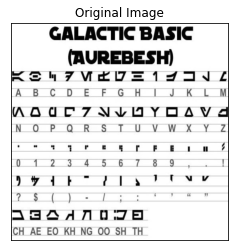

In [ ]:
 # Show sharpening effect
#image = cv2.resize(image, (800, 600))

#cv2.imshow('Original Image', image)
#plt.subplot(121),
plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Image1'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

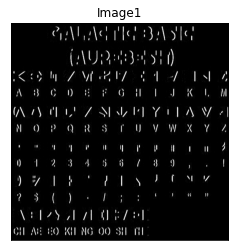

In [ ]:
output_1 = cv2.filter2D(image, -1, kernel_Prewitt_x)
#output_1 = cv2.resize(output_1, (800, 600))
#cv2.imshow('sharpen_1 Image', output_1)
plt.imshow(output_1,cmap = 'gray')
plt.title('Image1'), plt.xticks([]), plt.yticks([])

output_1

(Text(0.5, 1.0, 'Image2'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

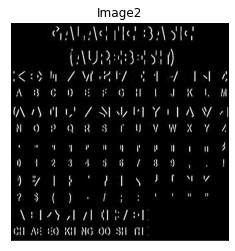

In [ ]:
output_2 = cv2.filter2D(image, -1, kernel_Sobel_x)
#output_2 = cv2.resize(output_2, (800, 600))
#cv2.imshow('sharpen_2 Image', output_2)
#plt.subplot(121),
plt.imshow(output_2,cmap = 'gray')
plt.title('Image2'), plt.xticks([]), plt.yticks([])

output_2

(Text(0.5, 1.0, 'Image3'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

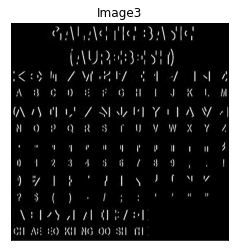

In [ ]:
output_3 = cv2.filter2D(image, -1, kernel_Prewitt_x)
#output_3 = cv2.resize(output_3, (800, 600))
#cv2.imshow('sharpen_3 Image', output_3)
#plt.subplot(121),
plt.imshow(output_3,cmap = 'gray')
plt.title('Image3'), plt.xticks([]), plt.yticks([])

output_3

(Text(0.5, 1.0, 'Image4'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

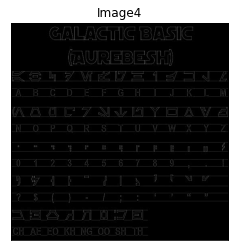

In [ ]:
output_4 = cv2.filter2D(image, -1, kernel_Laplacian_1)
#output_4 = cv2.resize(output_4, (800, 600))
#cv2.imshow('sharpen_4 Image', output_4)
#plt.subplot(121),
plt.imshow(output_4,cmap = 'gray')
plt.title('Image4'), plt.xticks([]), plt.yticks([])

output_4

(Text(0.5, 1.0, 'Image5'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

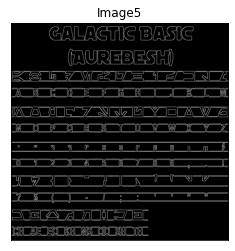

In [ ]:
output_5 = Canny(image,3,50,150)
output_5 = cv2.resize(output_5, (800, 600))
#cv2.imshow('sharpen_5 Image', output_5)
#plt.subplot(121),
plt.imshow(output_5,cmap = 'gray')
plt.title('Image5'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Image6'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

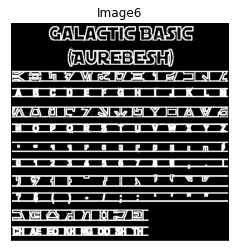

In [ ]:
output_6 = kirsch(image)
#output_6 = cv2.resize(output_6, (800, 600))
#cv2.imshow('sharpen_6 Image', output_6)
#plt.subplot(121),
plt.imshow(output_6,cmap = 'gray')
plt.title('Image6'), plt.xticks([]), plt.yticks([])